In [2]:
import numpy as np
import pandas as pd
import random
import tqdm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns 
import yaml
from pathlib import Path
import sys 
import os 
sys.path.append(os.path.dirname(os.getcwd()))
from util.functions import logistic
from structure_generation.path_connection_gen import ProceduralGraphGenerator, StatsUtils, GraphStructureGenerator

In [3]:
graphgen = GraphStructureGenerator(
    structure_name="random_geometric", 
    num_nodes=100, 
    target_mean_degree = 5
)
graph = graphgen.initial_graph  

In [7]:
giant_graph = graph.subgraph(max(nx.connected_components(graph), key=len))


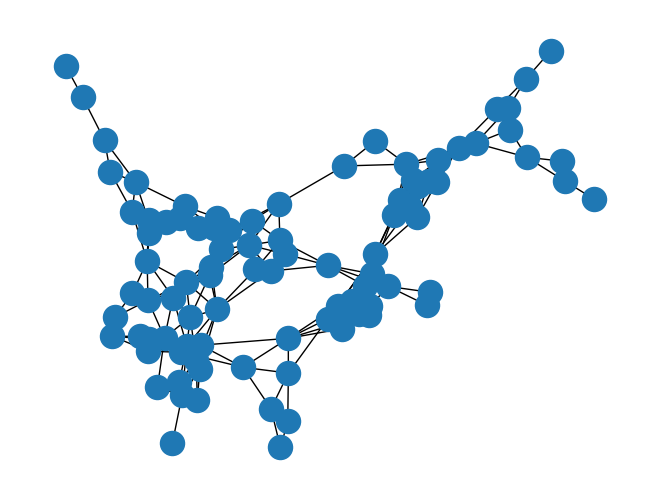

In [8]:
import networkx as nx 
nx.draw(giant_graph)